## Graphic Reports on Mental Health Data using Folium

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib as plt
%matplotlib inline
# %matplotlib notebook the graph is interactive
#%matplotlib notebook 
import folium
from IPython.display import display
import os.path
from folium.plugins import MarkerCluster
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**Data downloaded from SAMHSA (Substance Abuse and Mental Health Services Administration) website** https://www.samhsa.gov/data/report/2016-2017-nsduh-estimated-totals-state

In [2]:
# Load data
f = 'data/NSDUHsaeTotals-Tab27-2017.csv'
mentalillness = pd.read_csv(f,encoding = "ISO-8859-1", skiprows=6)
mentalillness.head()

,Order,State,18 or Older Estimate,18 or Older 95% CI (Lower),18 or Older 95% CI (Upper),18-25 Estimate,18-25 95% CI (Lower),18-25 95% CI (Upper),26 or Older Estimate,26 or Older 95% CI (Lower),26 or Older 95% CI (Upper)
0,1,Total U.S.,"10,775","10,354","11,213","2,300","2,177","2,430","8,475","8,082","8,886"
1,2,Northeast,"1,827","1,690","1,974",396,360,436,"1,430","1,303","1,569"
2,3,Midwest,"2,394","2,256","2,540",520,482,561,"1,874","1,746","2,011"
3,4,South,"3,982","3,770","4,205",800,745,860,"3,181","2,983","3,393"
4,5,West,"2,572","2,394","2,763",583,529,642,"1,989","1,827","2,166"


In [3]:
# Load data
f = 'data/NSDUHsaeTotals-Tab30-2017.csv'
suicide = pd.read_csv(f,encoding = "ISO-8859-1", skiprows=6)
suicide.head()

,Order,State,18 or Older Estimate,18 or Older 95% CI (Lower),18 or Older 95% CI (Upper),18-25 Estimate,18-25 95% CI (Lower),18-25 95% CI (Upper),26 or Older Estimate,26 or Older 95% CI (Lower),26 or Older 95% CI (Upper)
0,1,Total U.S.,"10,308","9,914","10,702","3,321","3,176","3,471","6,987","6,641","7,351"
1,2,Northeast,"1,749","1,614","1,893",572,530,618,"1,177","1,057","1,310"
2,3,Midwest,"2,243","2,102","2,389",733,688,780,"1,510","1,385","1,646"
3,4,South,"3,728","3,520","3,941","1,183","1,115","1,255","2,545","2,356","2,748"
4,5,West,"2,588","2,399","2,788",833,770,900,"1,756","1,590","1,938"


In [4]:
mentalillness=mentalillness.iloc[:,:3].rename(columns={'18 or Older Estimate': 'Number'})
mentalillness.tail()
suicide=suicide.iloc[:,:3].rename(columns={'18 or Older Estimate': 'Number'})
suicide.tail()

,Order,State,Number
51,52,Virginia,255
52,53,Washington,301
53,54,West Virginia,81
54,55,Wisconsin,217
55,56,Wyoming,21


,Order,State,Number
51,52,Virginia,268
52,53,Washington,283
53,54,West Virginia,68
54,55,Wisconsin,204
55,56,Wyoming,19


In [5]:
mentalillness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
Order     56 non-null int64
State     56 non-null object
Number    56 non-null object
dtypes: int64(1), object(2)
memory usage: 1.4+ KB


In [6]:
# Number column is object type, change it to int

In [7]:
mentalillness['Number']=mentalillness['Number'].str.replace(',','').astype(int)
suicide['Number']=suicide['Number'].str.replace(',','').astype(int)

In [8]:
mentalillness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
Order     56 non-null int64
State     56 non-null object
Number    56 non-null int32
dtypes: int32(1), int64(1), object(1)
memory usage: 1.2+ KB


In [9]:
mentalillness.describe()

,Order,Number
count,56.000000,56.000000
mean,28.500000,577.250000
std,16.309506,1558.329843
min,1.000000,21.000000
25%,14.750000,71.000000
50%,28.500000,177.500000
75%,42.250000,337.000000
max,56.000000,10775.000000


In [10]:
suicide.describe()

,Order,Number
count,56.000000,56.000000
mean,28.500000,552.232143
std,16.309506,1490.687626
min,1.000000,19.000000
25%,14.750000,66.750000
50%,28.500000,162.000000
75%,42.250000,313.500000
max,56.000000,10308.000000


In [11]:
# Load Geographic Coordinate for all states
f = 'data/StateCoordinate.xlsx'
state = pd.read_excel(f)
state.head()

,State,Latitude,Longitude
0,Alabama,32.806671,-86.791130
1,Alaska,61.370716,-152.404419
2,Arizona,33.729759,-111.431221
3,Arkansas,34.969704,-92.373123
4,California,36.116203,-119.681564


In [12]:
mental=pd.merge(mentalillness, state, on='State')
mental.head()

,Order,State,Number,Latitude,Longitude
0,6,Alabama,177,32.806671,-86.791130
1,7,Alaska,26,61.370716,-152.404419
2,8,Arizona,217,33.729759,-111.431221
3,9,Arkansas,122,34.969704,-92.373123
4,10,California,1174,36.116203,-119.681564


In [13]:
suicide=pd.merge(suicide, state, on='State')
suicide.head()

,Order,State,Number,Latitude,Longitude
0,6,Alabama,144,32.806671,-86.791130
1,7,Alaska,28,61.370716,-152.404419
2,8,Arizona,211,33.729759,-111.431221
3,9,Arkansas,103,34.969704,-92.373123
4,10,California,1205,36.116203,-119.681564


In [14]:
stateAb={'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'}

In [15]:
mental['State1']=mental['State'].map(stateAb)
mental.head()

,Order,State,Number,Latitude,Longitude,State1
0,6,Alabama,177,32.806671,-86.791130,AL
1,7,Alaska,26,61.370716,-152.404419,AK
2,8,Arizona,217,33.729759,-111.431221,AZ
3,9,Arkansas,122,34.969704,-92.373123,AR
4,10,California,1174,36.116203,-119.681564,CA


### Histogram for mental illness

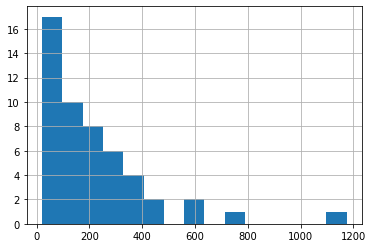

In [16]:
mental.Number.hist(bins=15)

In [17]:
# Change colors based on 25%,50%,75% numbers
def color_change(c):
    if(c < 70):
        return('blue')
    elif(70 <= c < 180):
        return('green')
    elif(180 <= c < 340):
        return('orange')
    else:
        return('red')

In [18]:
#State,Count,Latitude,Longitude
num = mental['Number'].values
lat = mental['Latitude'].values
lon = mental['Longitude'].values
name= mental['State'].values 


In [19]:
num 

array([ 177,   26,  217,  122, 1174,  214,  116,   36,   25,  625,  333,
         37,   72,  402,  259,  109,  102,  187,  164,   49,  179,  256,
        349,  178,  102,  226,   42,   61,   96,   56,  253,   68,  590,
        359,   26,  439,  144,  172,  441,   38,  166,   28,  264,  763,
        132,   27,  255,  301,   81,  217,   21])

In [20]:
# Create base map 
America = [37.0902 , -95.7129]
map = folium.Map(location = America,
                 zoom_start = 4, 
                 tiles = "OpenStreetMap")
locations = list(zip(lat, lon))
marker_cluster = MarkerCluster(name="Circle Markers")
marker_cluster.add_to(map)


In [21]:
# download geo_data json from: https://github.com/python-visualization/folium/tree/master/examples/data
state_geo = os.path.join('./data/', 'us-states.json')

In [22]:
# add Choropleth
folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=mental,
    columns=['State', 'Number'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    highlight =True,
    legend_name='Number of people with serious mental illness (in thousands)'
).add_to(map)
display(map)

In [23]:
# Add markers
for _lat, _lon, _num, _name in zip(lat, lon, num, name):
    folium.CircleMarker(location = [_lat, _lon], 
                        radius = 15, 
                        tooltip = str(_num)+" thousand people in "+_name, #popup
                        fill_color = color_change(_num), 
                        color = "gray", 
                        fill_opacity = 0.6).add_to(marker_cluster)
    
f = 'serious_mental_illness_statistics_by_state.html'
folium.LayerControl().add_to(map)
map.save(f)
#display(map)
map

### Repeated for suicide data

In [24]:
### Histogram for suicide

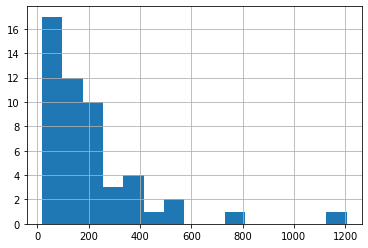

In [25]:
#%matplotlib notebook 
# %matplotlib notebook needs to call every time before plotting
suicide.Number.hist(bins=15)

In [26]:
# Change colors based on 25%,50%,75% numbers
def color_change(c):
    if(c < 70):
        return('blue')
    elif(70 <= c < 160):
        return('green')
    elif(160 <= c < 320):
        return('orange')
    else:
        return('red')

In [27]:
#State,Count,Latitude,Longitude
num = suicide['Number'].values
lat = suicide['Latitude'].values
lon = suicide['Longitude'].values
name= suicide['State'].values

In [28]:
# Create base map 
America = [37.0902 , -95.7129]
map2 = folium.Map(location = America,
                 zoom_start = 4, 
                 tiles = "OpenStreetMap")
locations = list(zip(lat, lon))
marker_cluster = MarkerCluster(name="Circle Markers")
marker_cluster.add_to(map2)


In [29]:
# add Choropleth
folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=suicide,
    columns=['State', 'Number'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    highlight =True,
    legend_name='Number of people with serious thoughts of suicide (in thousands)'
).add_to(map2)
display(map2)

In [30]:
# Add markers
for _lat, _lon, _num, _name in zip(lat, lon, num, name):
    folium.CircleMarker(location = [_lat, _lon], 
                        radius = 15, 
                        tooltip = str(_num)+" thousand people in "+_name, #popup
                        fill_color = color_change(_num), 
                        color = "gray", 
                        fill_opacity = 0.6).add_to(marker_cluster)
    
f = 'serious_thoughts_of_suicide_statistics_by_state.html'
folium.LayerControl().add_to(map2)
map2.save(f)
display(map2)
#map2

### Suicide and mental illness have similar geographical distribution